### Importação das bibliotecas

In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Leitura do arquivo

In [96]:
df = pd.read_csv("./datasets/data.csv", sep=",")
df

,filename,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
0,imagens/selecionadas/boa_qualidade/3391453209.jpg,132.609966,121.227249,124.231548,77.783824,69.308145,67.421205,13.189166,13.277505,20.334358,21.528245,1
1,imagens/selecionadas/boa_qualidade/3274691778.jpg,66.165817,44.555141,16.569908,69.099801,57.499889,38.438030,5.298978,7.668856,10.649066,16.816179,1
2,imagens/selecionadas/boa_qualidade/3363342011.jpg,77.994858,70.928452,81.287174,95.512351,83.056987,65.150531,4.711894,7.193683,8.418819,13.501021,1
3,imagens/selecionadas/boa_qualidade/3359563671.jpg,75.615658,79.028858,88.636810,38.806435,37.705454,40.135014,3.963080,5.991780,9.907831,13.684910,1
4,imagens/selecionadas/boa_qualidade/3307667255.jpg,112.128551,98.476761,86.907909,67.015909,65.093914,64.762853,8.664269,14.697718,14.127406,23.532887,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,imagens/selecionadas/escuras_ruins/2015_03985.jpg,25.093895,24.500557,22.681580,24.635103,23.453142,22.314595,1.650287,1.694096,5.943454,8.405698,0
2096,imagens/selecionadas/escuras_ruins/2015_05839.jpg,16.278244,16.098171,16.927536,26.044997,25.645297,23.383744,0.821251,0.943275,3.102364,3.638713,0
2097,imagens/selecionadas/escuras_ruins/2015_00176.jpg,40.049698,12.688789,3.469101,37.774832,21.465189,8.702481,3.820762,3.532297,7.436229,7.322762,0
2098,imagens/selecionadas/escuras_ruins/2015_03045.png,29.009560,26.468601,24.881416,42.588287,41.339594,40.756837,1.746537,3.285583,5.360037,10.139739,0


#### Manipulações no arquivo

In [97]:
# Criacao de uma tag para identificar as categorias de imagens:
df["quality_tag"] = df.filename.apply(lambda x: x.split('/')[2])
df

,filename,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality,quality_tag
0,imagens/selecionadas/boa_qualidade/3391453209.jpg,132.609966,121.227249,124.231548,77.783824,69.308145,67.421205,13.189166,13.277505,20.334358,21.528245,1,boa_qualidade
1,imagens/selecionadas/boa_qualidade/3274691778.jpg,66.165817,44.555141,16.569908,69.099801,57.499889,38.438030,5.298978,7.668856,10.649066,16.816179,1,boa_qualidade
2,imagens/selecionadas/boa_qualidade/3363342011.jpg,77.994858,70.928452,81.287174,95.512351,83.056987,65.150531,4.711894,7.193683,8.418819,13.501021,1,boa_qualidade
3,imagens/selecionadas/boa_qualidade/3359563671.jpg,75.615658,79.028858,88.636810,38.806435,37.705454,40.135014,3.963080,5.991780,9.907831,13.684910,1,boa_qualidade
4,imagens/selecionadas/boa_qualidade/3307667255.jpg,112.128551,98.476761,86.907909,67.015909,65.093914,64.762853,8.664269,14.697718,14.127406,23.532887,1,boa_qualidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,imagens/selecionadas/escuras_ruins/2015_03985.jpg,25.093895,24.500557,22.681580,24.635103,23.453142,22.314595,1.650287,1.694096,5.943454,8.405698,0,escuras_ruins
2096,imagens/selecionadas/escuras_ruins/2015_05839.jpg,16.278244,16.098171,16.927536,26.044997,25.645297,23.383744,0.821251,0.943275,3.102364,3.638713,0,escuras_ruins
2097,imagens/selecionadas/escuras_ruins/2015_00176.jpg,40.049698,12.688789,3.469101,37.774832,21.465189,8.702481,3.820762,3.532297,7.436229,7.322762,0,escuras_ruins
2098,imagens/selecionadas/escuras_ruins/2015_03045.png,29.009560,26.468601,24.881416,42.588287,41.339594,40.756837,1.746537,3.285583,5.360037,10.139739,0,escuras_ruins


### Análises gerais

Ideias de análises - Estatísticas básicas:
  * Visualização exploratória. ok
  * Representação adequada dos dados. ok
  * Normalização dos dados. ok
  * Dados discrepantes (outliers)? ok
  * Dados faltantes? ok
  * Seleção/combinação de atributos? ok
  * Dados desbalanceados? Subamostragem? Sobreamostragem? ok

#### Análise de dados faltantes

In [213]:
(df.isnull() == True).sum()/df.shape[0]

filename       0.0
r_mean         0.0
g_mean         0.0
b_mean         0.0
r_std          0.0
g_std          0.0
b_std          0.0
h_mean         0.0
v_mean         0.0
h_std          0.0
v_std          0.0
quality        0.0
quality_tag    0.0
dtype: float64

#### Análise de desbalanceamento

In [85]:
# Verificação dos tipos de imagem e da proporção de amostras por classe
contagem = df.quality_tag.value_counts()
proporcao = (contagem / len(df))*100 

pd.DataFrame({'Classe': contagem.index, 'Contagem': contagem.values, 'Proporção': proporcao.values})

,Classe,Contagem,Proporção
0,boa_qualidade,700,33.333333
1,escuras_boas,350,16.666667
2,escuras_ruins,350,16.666667
3,movimento,350,16.666667
4,desfoque,350,16.666667


#### Análise dos dados por tipo de categoria de imagem

In [86]:
# Descrição geral dos dados
df.describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,95.359312,88.014077,80.282106,54.658121,51.870336,50.783907,6.246112,6.462432,10.835180,11.521877,0.500000
std,46.558388,46.942458,48.543839,17.791502,17.417658,20.060512,3.884642,4.335191,5.591048,6.602253,0.500119
min,0.407383,0.543880,0.714695,4.529520,4.409185,2.473228,0.429284,0.396105,0.530823,0.502865,0.000000
25%,56.917073,45.460307,35.642459,43.187515,40.995656,36.785335,3.436799,3.289612,6.453927,5.936361,0.000000
50%,101.258001,92.609028,81.456106,55.641331,52.392981,51.577539,5.145042,5.227004,10.147909,10.697539,0.500000
75%,130.786313,125.100592,117.632441,67.500018,64.409497,65.091631,8.143663,8.595390,14.243166,16.020653,1.000000
max,220.176311,214.544300,223.166931,106.034132,106.656849,106.440737,24.639619,30.877140,38.580063,39.951795,1.000000


In [87]:
df[df.quality_tag == 'boa_qualidade'].describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,113.863631,107.576623,99.279744,62.375695,59.669155,59.574694,9.464727,10.049140,15.067467,16.619353,1.0
std,33.110280,34.611919,39.008595,14.317227,14.105809,16.082386,4.091190,4.656640,4.967907,5.703519,0.0
min,13.955849,10.871216,10.208118,22.490051,21.163950,13.864142,1.958840,1.654220,3.612318,3.499646,1.0
25%,92.045835,86.121741,71.127954,52.633556,49.605432,49.164118,6.362075,6.497015,11.399701,12.404669,1.0
50%,114.257608,108.376034,97.358099,62.676045,60.208442,59.009084,8.815651,9.355779,14.422721,16.197451,1.0
75%,136.300040,129.882720,123.237502,72.430803,69.165367,70.905784,11.844814,12.675542,18.270624,20.149558,1.0
max,219.476212,214.544300,223.166931,102.622730,97.065455,106.440737,24.639619,30.877140,36.528616,39.951795,1.0


In [88]:
df[df.quality_tag == 'desfoque'].describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,122.249566,118.495708,111.208890,54.159091,55.003735,57.188928,4.078610,3.776749,6.343103,5.919407,0.0
std,31.688230,31.446101,33.744330,16.183346,15.731661,17.098718,1.879052,2.008413,2.855560,2.969443,0.0
min,14.735592,12.354774,6.089745,8.232923,9.454200,3.324270,0.648070,0.622607,0.530823,0.502865,0.0
25%,103.579722,99.786088,89.343268,42.755005,46.067227,47.263187,2.804192,2.606456,4.324688,4.038756,0.0
50%,124.162010,122.641975,115.376799,54.180567,55.494514,57.535759,3.748040,3.449258,6.077308,5.308050,0.0
75%,143.928829,139.480880,133.736592,65.925514,65.971054,68.240829,4.870012,4.384686,7.751584,7.013786,0.0
max,206.780605,205.978111,199.736206,90.953028,88.765516,98.168615,12.551460,19.961596,16.108454,25.714202,0.0


In [89]:
df[df.quality_tag == 'movimento'].describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,126.537426,119.339738,111.870124,53.327401,53.439862,55.519398,4.659572,3.889529,7.743050,6.026401,0.0
std,34.657511,34.414229,37.158363,16.399894,15.871897,17.603777,2.839440,2.574866,4.662221,4.495094,0.0
min,15.357925,11.588524,4.709873,8.173417,9.298312,3.601007,1.046378,0.866848,1.135200,0.780570,0.0
25%,107.021038,99.454171,88.642637,43.508308,43.756286,44.710751,2.836566,2.273746,4.482786,2.823396,0.0
50%,128.286457,118.457439,112.389404,53.446868,53.230803,56.312344,4.036864,3.209478,6.682316,4.846004,0.0
75%,148.799571,142.256577,137.365914,65.050250,65.094066,67.237488,5.596502,4.502804,10.022899,7.416328,0.0
max,220.176311,208.023514,202.883232,92.935753,92.366213,97.570176,23.859176,21.381397,38.580063,36.470405,0.0


In [90]:
df[df.quality_tag == 'escuras_boas'].describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,65.858156,49.856845,37.940899,57.774548,49.659540,43.433578,6.120374,6.892470,11.968018,13.650438,1.0
std,26.087805,18.289362,21.115411,14.887402,13.737621,16.647712,2.555960,2.805816,4.387323,4.783119,0.0
min,13.929787,12.672661,2.673965,19.064368,16.364799,5.237776,1.867893,1.935667,2.927033,3.285227,1.0
25%,49.346527,36.633055,22.781083,47.971025,41.146959,31.933086,4.427498,4.793579,8.909177,10.244351,1.0
50%,61.769331,47.607906,34.168734,56.868765,48.140759,43.532863,5.636554,6.399885,11.444722,13.350918,1.0
75%,79.632157,60.361793,51.267958,67.902878,58.580668,53.334533,7.298259,8.262343,14.352293,16.141620,1.0
max,209.895561,117.951920,128.005161,106.034132,106.656849,97.553430,17.949206,17.758834,27.515296,29.803473,1.0


In [91]:
df[df.quality_tag == 'escuras_ruins'].describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,29.783461,25.238928,22.113234,37.936296,33.780570,29.412153,3.688663,4.117565,8.821975,10.296310,0.0
std,19.581831,15.824014,16.876508,18.140163,16.448876,17.088153,2.125966,2.385558,4.281668,5.017563,0.0
min,0.407383,0.543880,0.714695,4.529520,4.409185,2.473228,0.429284,0.396105,1.134908,1.315301,0.0
25%,15.736965,12.791034,8.737906,24.534155,22.065352,17.332264,2.157753,2.304012,5.782785,6.406349,0.0
50%,25.853249,22.065910,17.934013,35.619841,30.361114,26.436485,3.305939,3.551899,8.359271,9.479245,0.0
75%,38.916354,34.426988,30.928510,49.281435,43.394435,39.824651,4.731465,5.477147,10.989742,14.116006,0.0
max,117.677250,84.351414,91.814247,97.059508,97.059508,97.059508,13.517888,12.367647,26.309490,23.393156,0.0


#### Análise de visualização exploratória

##### Boxplot

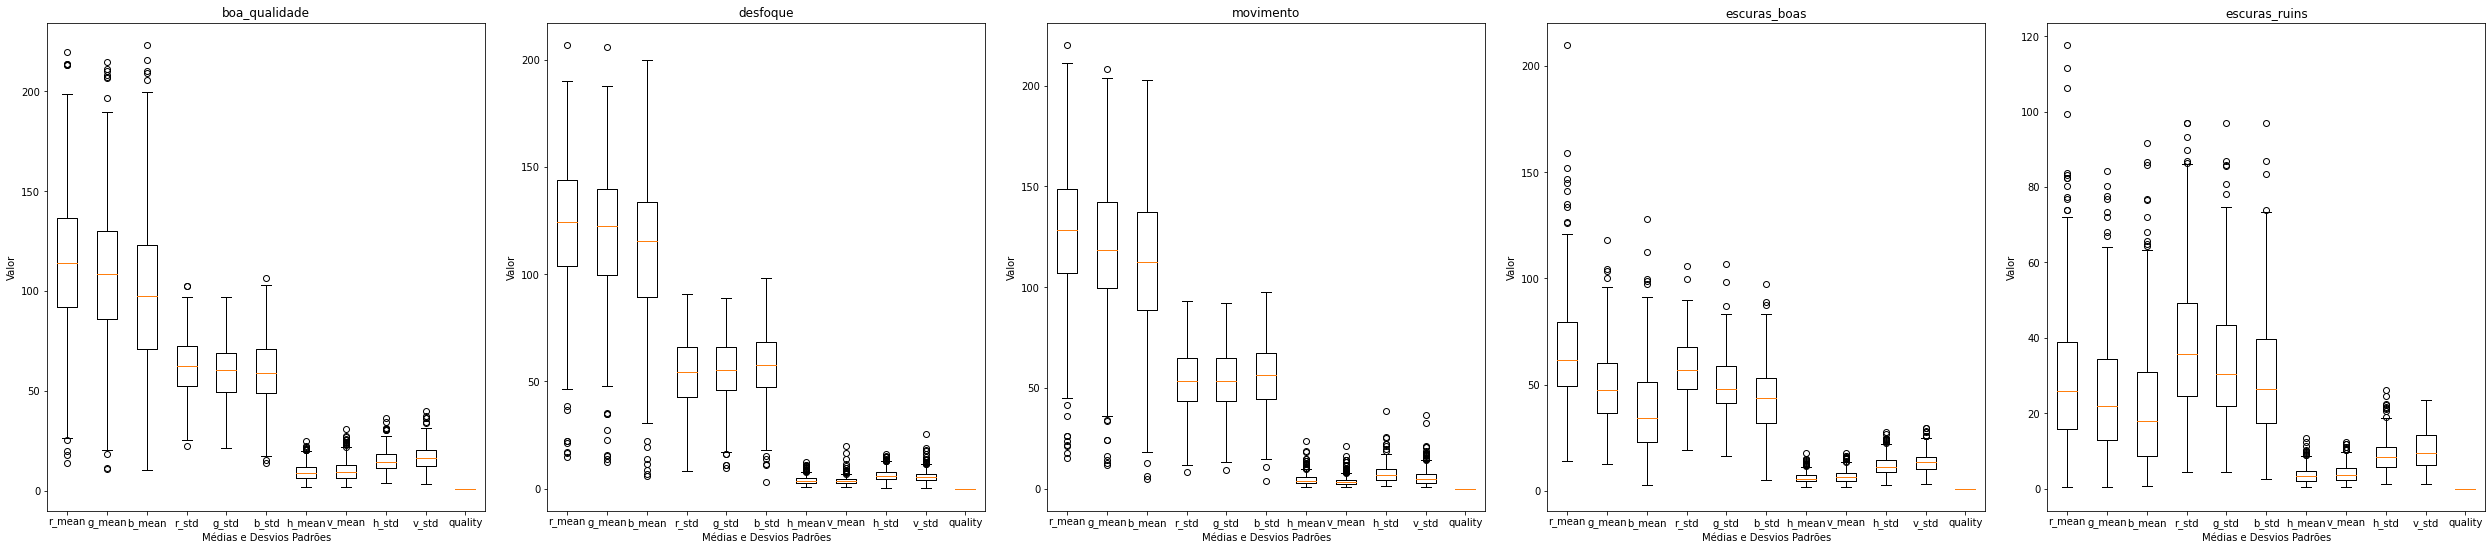

In [250]:
# Lista de classes
classes = df['quality_tag'].unique()

# Configurações do gráfico
fig, axs = plt.subplots(nrows=1, ncols=len(classes), figsize=(35,8))

# Traçar boxplot para cada classe
for i, classe in enumerate(classes):
    subset = df[df['quality_tag'] == classe].iloc[:, 1:-1]
    labels = subset.columns.tolist()
    data = [subset[col].values for col in labels]
    axs[i].boxplot(data, labels=labels)
    axs[i].set_title(classe)
    axs[i].set_ylabel('Valor')
    axs[i].set_xlabel('Médias e Desvios Padrões')

plt.tight_layout(pad=2.0)
plt.show()


#### Comportamento da Média e do Desvio Padrão

In [195]:
def plot_line_graphs(df, means, std, colors_mean, colors_std, classes):
    fig, axs = plt.subplots(nrows=2, ncols=len(classes), figsize=(30,10))

    # Traçar gráfico de linhas para cada classe
    for i, classe in enumerate(classes):
        subset = means[df['quality_tag'] == classe]
        for col in subset.columns:
            axs[0, i].plot(range(len(subset)), subset[col], marker='o', label=col, color=colors_mean[col])
        axs[0, i].set_title(classe)
        axs[0, i].set_ylabel('Valor')
        axs[0, i].set_xlabel('Médias')
        axs[0, i].legend()

        subset = std[df['quality_tag'] == classe]
        for col in subset.columns:
            axs[1, i].plot(range(len(subset)), subset[col], marker='o', label=col, color=colors_std[col])
        axs[1, i].set_title(classe)
        axs[1, i].set_ylabel('Valor')
        axs[1, i].set_xlabel('Desvios Padrões')
        axs[1, i].legend()

    plt.tight_layout(pad=2.0)
    plt.show()

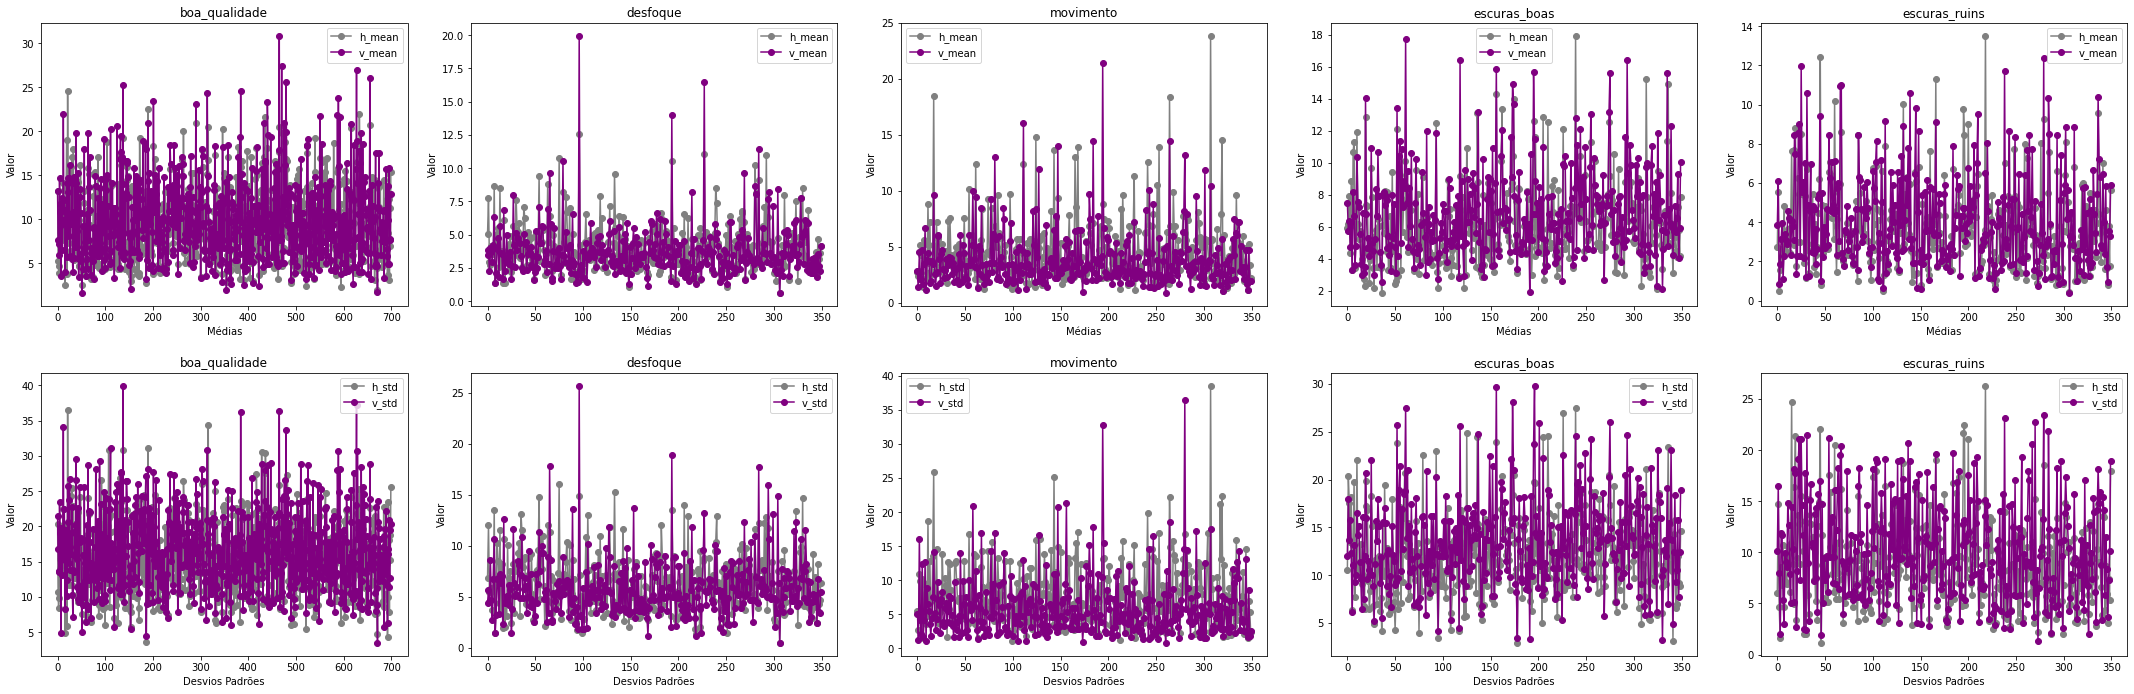

In [196]:

classes = df.quality_tag.unique()
means = df[['h_mean', 'v_mean']]
std = df[['h_std', 'v_std']]
colors_means = {'h_mean': 'gray', 'v_mean': 'purple'}
colors_std = {'h_std': 'gray', 'v_std': 'purple'}

plot_line_graphs(df, means, std, colors_means, colors_std, classes)

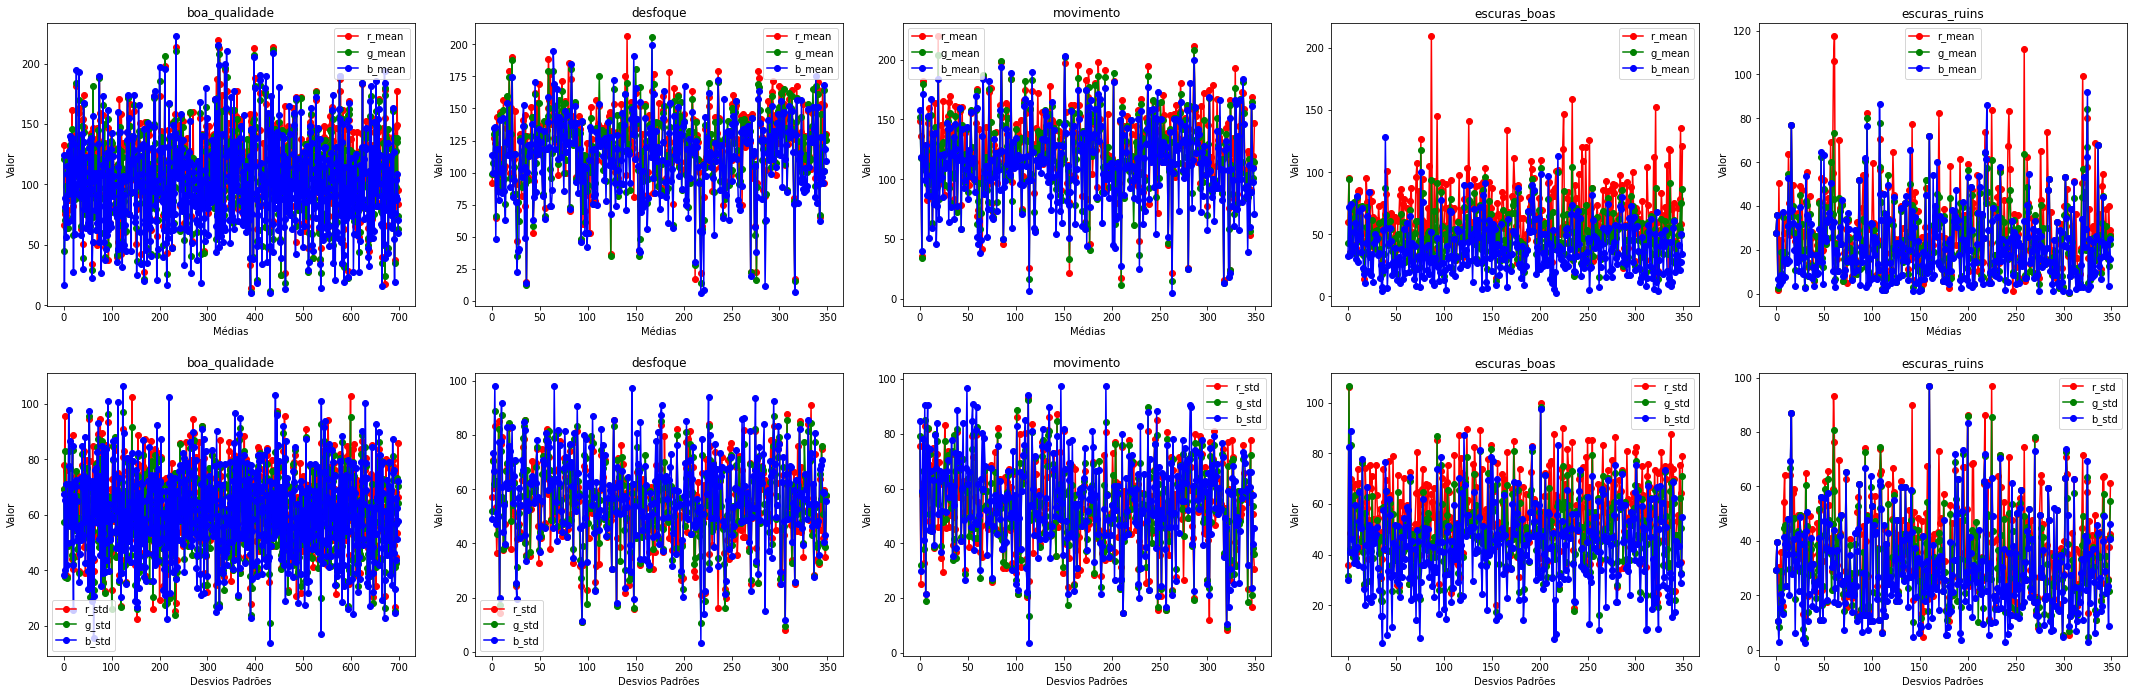

In [194]:
classes = df.quality_tag.unique()
means = df[['r_mean', 'g_mean', 'b_mean']]
std = df[['r_std', 'g_std', 'b_std']]
colors_means ={'r_mean': 'red', 'g_mean': 'green', 'b_mean': 'blue'}
colors_std = {'r_std': 'red', 'g_std': 'green', 'b_std': 'blue'}

plot_line_graphs(df, means, std, colors_means, colors_std, classes)


##### Heatmap da correlação entre as colunas

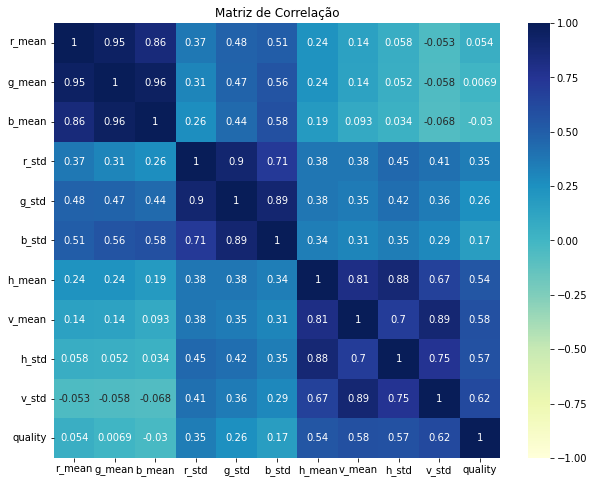

In [252]:
# Define as correlações
df_correlacao = df.corr()

# Cria o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlacao, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


#### Normalização dos dados

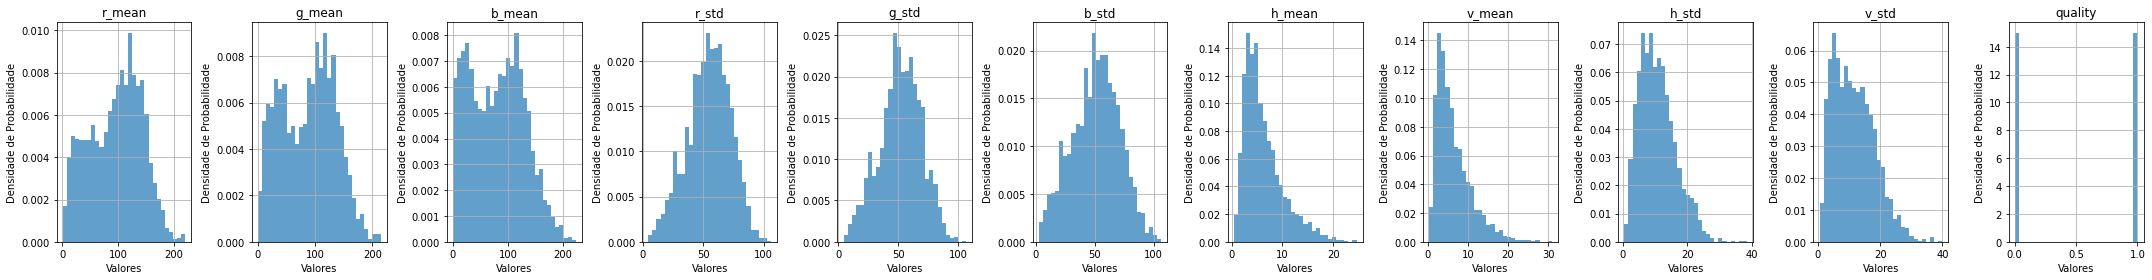

In [231]:
# Selecionar as colunas do DataFrame (excluindo a primeira e a última coluna)
data = df.iloc[:, 1:-1]

# Plotar o gráfico da distribuição para cada coluna
fig, axs = plt.subplots(nrows=1, ncols=data.shape[1], figsize=(30, 4))

for i, col in enumerate(data.columns):
    axs[i].hist(data[col], bins=30, density=True, alpha=0.7)
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Densidade de Probabilidade')
    axs[i].set_title(col)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

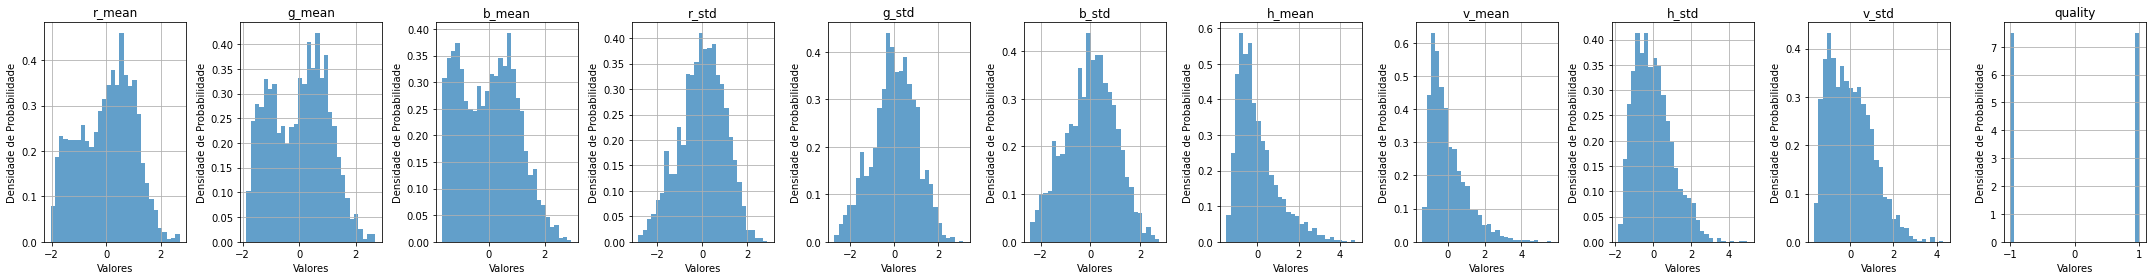

In [245]:
data = df.iloc[:, 1:-1]

# Criar uma instância do StandardScaler
scaler = StandardScaler()
# Normalizar as colunas do DataFrame
df_normalized = scaler.fit_transform(data)
# Criar um novo DataFrame a partir dos dados normalizados
df_normalized = pd.DataFrame(df_normalized, columns=data.columns)

# Plotar o gráfico da distribuição para cada coluna
fig, axs = plt.subplots(nrows=1, ncols=df_normalized.shape[1], figsize=(30, 4))

for i, col in enumerate(df_normalized.columns):
    axs[i].hist(df_normalized[col], bins=30, density=True, alpha=0.7)
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Densidade de Probabilidade')
    axs[i].set_title(col)
    axs[i].grid(True)

plt.tight_layout()
plt.show()